# Fuente puntual de caudal constante frente a un plano


**Pablo Cobelli** - Departamento de Física, FCEN-UBA, Argentina.  
Estructura de la Materia 1 - _Última actualización: Mayo de 2015._  

**Este apunte tiene licencia [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/). **

----

## Motivacion

En esta notebook vamos a considerar un problema basico del metodo de imagenes para flujos potenciales bidimensionales, aquel en el que se busca determinar el potencial complejo asociado a una fuente de caudal constante $Q$ ubicada a una distancia $d$ de un plano infinito.

**En este caso el objetivo es ilustrar, en este caso sencillo, como es posible resolver este problema en Python empleando las capacidades de calculo simbolico del paquete [sympy](http://www.sympy.org)**.

### Resolucion

Para ser concretos vamos a considerar que la posicion del plano viene dada por $y=0$, y que la fuente de caudal $Q$ esta ubicada en $z = (x+iy) = id$. 

Resulta evidente que, a fin de que el plano $y=0$ sea una linea de corriente debemos ubicar una fuente *imagen* de igual caudal en $z = -id$, es decir, interior al contorno que estamos considerando.

Luego el potencial complejo $W(z)$ de la fuente real y su imagen por el plano viene dado por:

$$W(z) = \frac{Q}{2\pi} \log(z-id) + \frac{Q}{2\pi} \log(z+id).$$

Es facil ver que este potencial complejo hace que el contorno $y=0$ sea efectivamente una linea de corriente. Para ello, basta con calcular $W(z)$ en $y=0$, es decir, $W(x)$. En ese caso, 

$$W(x) = \frac{Q}{2\pi} \log(x-id) + \frac{Q}{2\pi} \log(x+id) = \frac{Q}{2\pi} \log \left[ (x-id)(x+id)\right],$$

pero esta expresion es equivalente a

$$W(x) = \frac{Q}{2\pi} \log \left[x^2+d^2 \right].$$

Ahora bien, dado que $x$ y $d$ son reales, esta expresion tiene parte imaginaria nula. Dado que el potencial complejo esta definido por $W(z) = \phi(z) + i \psi(z)$, la ultima expresion nos dice que la funcion corriente es constante (y de valor nulo) sobre el plano $y=0$, lo que significa que el contorno es efectivamente una linea de corriente.

Habiendo calculado el potencial complejo, el campo de velocidades (conjugado) se obtiene facilmente a partir de él derivandolo respecto de la variable compleja $z$. De esa operacion se obtiene: 

$$\frac{dW}{dz} = \frac{Q}{2\pi} \left( \frac{1}{z-id} + \frac{1}{z+id}  \right) = 
\frac{Q}{2\pi} \frac{2\: z}{z^2+d^2}$$

expresion en la cual podemos reemplazar $z$ por $x+iy$ para marcar mas claramente la separacion entre partes real e imaginaria del campo de velocidades conjugado

$$\frac{dW}{dz} = u^* = u_x - i u_y = \frac{Q}{2\pi} \frac{2 \:(x+ i \:y)}{(x+iy)^2+d^2}. $$

Observen que si ahora quisieramos obtener una expresion para el campo de velocidades en cada direccion cartesiana del espacio, habria que considerar las partes real e imaginaria de la expresion a la derecha de la ultima igualdad. Si bien esas operaciones no presentan dificultad, queria mostrarles como es posible explotar la capacidad de calculo simbolico de Python (a traves de la libreria **sympy**) para calcular las expresiones asociadas a $u_x$ y $u_y$ y graficar los resultados para valores concretos de los parametros del problema.

### Resolucion simbolica empleando **sympy**

Comencemos llamando a la libreria de calculo simbolico; esto se logra con la primera de las siguientes dos lineas de codigo Python. La segunda linea hace que las respuestas que obtengamos (es decir, las expresiones simbolicas que nos devuelva Python) esten correctamente formateadas para que sean facilmente lisibles en pantalla. 

In [1]:
from sympy import *     # Importamos sympy, la libreria de calculo simbolico.
init_printing()         # Los resultados simbolicos se muestran en formato LaTeX.


Una vez que cargamos la libreria de calculo simbolico, vamos a definir las variables que emplearemos en el problema. 

En nuestro caso tenemos, por un lado, $x$ e $y$, que seran variables reales. Luego tenemos tambien $d$ y $Q$, que seran reales no negativos. Finalmente, tenemos la variable $z$, que sera compleja. Estas tres definiciones (por grupos) las realizamos con las siguientes 3 lineas de codigo:

In [2]:
x, y = symbols('x y', real=True)
d, Q = symbols('d Q', nonnegative=True)
z = Symbol('z', complex=True)


Ahora que tenemos nuestras variables simbolicas correctamente definidas, comenzamos el calculo. Cargamos entonces nuestra expresion para $dW/dz$, en la forma

In [3]:
expresion_dWdz = Q/2/pi*2*z/(z**2+d**2)

Python asigna entonces nuestra expresion a la variable 'expresion_dWdz', pero no nos da ninguna expresion como respuesta. Para ver lo que tenemos 'almacenado' en esa variable, hacemos simplemente

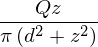

In [4]:
expresion_dWdz

y recuperamos la expresion a la que ya habiamos llegado con papel y lapiz previamente. Ahora le pedimos que reemplace $z$ por $x+iy$, lo que hacemos empleando el comando '`subs`':

In [5]:
expresion_dWdz_2 = expresion_dWdz.subs(z,x+I*y)

y para ver el resultado de la operacion hacemos

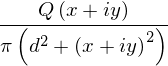

In [6]:
expresion_dWdz_2

Hasta aqui solo hemos recuperado los resultados que ya teniamos para el campo de velocidades conjugado (recuerden que $dW/dz = u^*$). Ahora vamos a pedirle a sympy que nos calcule la parte real de la ultima expresion, usando la funcion '`re`': 

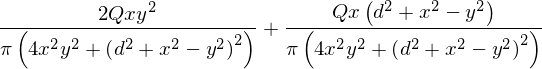

In [7]:
re(expresion_dWdz_2)

y tambien su parte imaginaria por medio de la funcion '`im`'

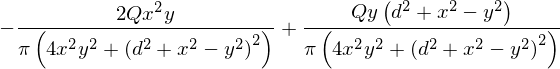

In [8]:
im(expresion_dWdz_2)


Observen que cualquiera de estas ultimas dos expresiones puede simplificarse considerablemente considerando el denominador comun. Esta factorizacion simbolica se puede realizar en **sympy** por medio del metodo '`factor`'. La forma de utilizarlo es la siguiente: 

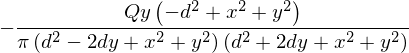

In [9]:
im(expresion_dWdz_2).factor()



Ahora podemos entonces definir las velocidades $u_x$ y $u_y$ empleando los resultados simbolicos obtenidos, para despues poder graficar el campo de velocidades. Hacemos eso asignando las partes real e imaginaria (ya simplificadas con el comando '`factor`') a las variables '`ux`' y '`uy`':

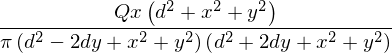

In [10]:
ux = re(expresion_dWdz_2).factor()
ux

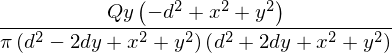

In [11]:
uy = -im(expresion_dWdz_2).expand().factor()
uy

### Graficar el campo de velocidades empleando las expresiones obtenidas simbolicamente


Antes de graficar el campo de velocidad, es importante mencionar que las expresiones que calculamos para `ux` y `uy` son para Python solo expresiones simbolicas. Entonces, en forma previa a poder utilizarlas para graficar, resulta necesario definirlas como funciones de sus variables. Esto se logra facilmente empleando el comando `lambdify`. 

En nuestro caso, `ux` y `uy` son funciones de las coordenadas $x$ e $y$, pero tambien son funciones de $d$ y $Q$. 

Definimos entonces las **funciones** `uxf` y `uyf` a partir de las expresiones que obtuvimos simbolicamente en la seccion anterior, con las siguientes dos lineas de codigo:

In [12]:
# Convertimos las expresiones simbolicas de sympy en funciones numericas de numpy.
uxf = lambdify((x,y,d,Q),ux,'numpy')
uyf = lambdify((x,y,d,Q),uy,'numpy')

El agregado de la opcion `'numpy'` al final de estas dos ultimas instrucciones le dice a Python que las funciones `uxf` y `uyf` van a ser empleadas con la libreria `numpy` de calculo numerico (al momento de graficar el campo de velocidades).

Observemos que ahora `uxf` es una funcion capaz de tomar valores concretos de $x, y, d$ y $Q$ y devolvernos un valor numerico concreto (es decir, ya no es una expresion simbolica):

In [13]:
uxf(0.5,0.5,1,1)


En este momento estamos en condiciones de graficar el campo de velocidades. Para ello, importemos la libreria **matplotlib** para graficacion:

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()

y la libreria **numpy** para el calculo numerico del campo de velocidades:

In [15]:
import numpy as np

Definimos entonces la grilla espacial sobre la que graficaremos. En este caso vamos a considerar una region dada por el producto cartesiano $x \times y = [-2,2 ] \times [-2,2 ]$, integrada por $50\times50$ puntos. Esto es lo que hacen las siguientes 3 lineas de codigo 

In [16]:
# Definimos la grilla espacial 2D sobre la que graficaremos.
xv = np.linspace(-2,2,50)
yv = np.linspace(-2,2,50)
x, y = np.meshgrid(xv, yv)

Finalmente, elegimos valores para $d$ y $Q$, y graficamos:

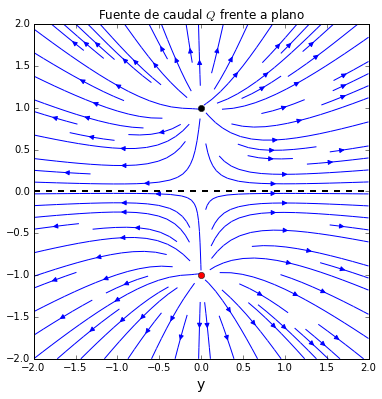

In [17]:
# Elegimos un valor para d y graficamos.
d = 1
Q = 1
plt.figure(figsize=(6,6))
plt.streamplot(x,y,uxf(x,y,d,Q),uyf(x,y,d,Q))
plt.plot(0,d,'ko')
plt.plot(0,-d,'ro')
plt.plot((-2,2),(0,0),'k--', linewidth=2)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel('x', fontsize=14)
plt.xlabel('y', fontsize=14)
plt.title('Fuente de caudal $Q$ frente a plano')
plt.gca().set_aspect('equal')

La figura muestra las lineas de corriente del campo de velocidades de una fuente puntual de caudal constante $Q$ ubicada a una distandia $d$ de un plano infinito. En la figura, la posicion de la fuente **real** se denota con un circulo negro, mientras que aquella correspondiente a la fuente **imagen** se señala con un circulo rojo. El plano se esquematiza mediante la linea punteada.

## Cómo utilizar este documento


Este documento es una guía para la determinacion del campo de velocidades irrotacional e incompresible en el semiespacio $y>0$ correspondiente a una fuente de caudal $Q>0$ constante ubicada a una distancia $d$ de un plano infinito empleando Python. 

Se emplean las librerías **[sympy](http://www.sympy.org)** (para el cálculo simbólico), **[numpy](http://www.numpy.org)** (para cálculo numérico) y **[matplotlib](http://www.matplotlib.org)** (para la representación gráfica de datos). 

Cada línea de código necesaria para el cálculo del ajuste se representa en letras de tipo de máquina de escribir (`como este texto`) y está precedida por la expresión "`In [·]:`", en azul. Por el contrario, las expresiones precedidas por "`Out [·]:`" representan la respuesta que Python nos dá a las instrucciones que le pasamos.
